In [ ]:
%matplotlib inline
import torch
from util import *
from train import *
import AECompare.AutoEncoder.autoencoder as ae

LATENT_LENGTH = 28
RANDOM_SEED = 42

latent_dir = train_store_latent(AE_type='AE', epochs=30, latent_len=LATENT_LENGTH, batch_size=128,
                learning_rate=0.001, random_seed=RANDOM_SEED, verbose=0)

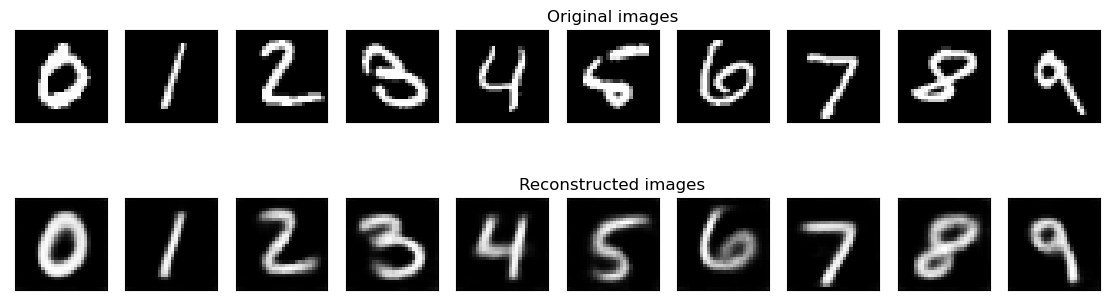

In [5]:
# Generate noisy data, get their latent space, and classify using the latent space
n=10
plt.figure(figsize=(14, 4))
for i in range(n):
    ax = plt.subplot(2, n, 1 + i)
    test_data = get_sep_indx_data(i, False)
    model = ae.AutoEncoder(latent_len=LATENT_LENGTH, digit=i, random_seed=42)
    model.load_state_dict(torch.load(f'AECompare/MNIST_digits_models/AE_models/{i}_{LATENT_LENGTH}_42.pth'))
    sample = test_data[0]
    img = sample[0].unsqueeze(0)
    label = sample[1]
    model.eval()
    with torch.no_grad():
        rec_img, _ = model.forward(img)
    plt.imshow(img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Original images')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(rec_img.squeeze().numpy(), cmap='gist_gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2:
        ax.set_title('Reconstructed images')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = process_latents(latent_dir, LATENT_LENGTH, RANDOM_SEED)
classify_using_latents(x_train, x_test, y_train, y_test)

0.99

In [9]:
plot_tsne(x_train, y_train)